<a href="https://colab.research.google.com/github/Debajyoti2004/Encryptix/blob/main/Credit_card_Fraud_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression


In [ ]:
df=pd.read_csv('fraudTrain.csv')
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
933816,933816,2020-01-06 05:42:37,3540210836308425,fraud_Herman Inc,misc_pos,35.82,Steven,Yoder,M,94975 David Mews Apt. 316,...,34.7437,-102.5064,53.0,Fisheries officer,1992-06-19,d3d3f1e6b099789d469cb9e94feba43a,1.357451e+09,34.837202,-101.883964,0.0
933817,933817,2020-01-06 05:42:45,503848303379,fraud_Roob LLC,grocery_net,38.52,Gregory,Wallace,M,27203 Darrell Landing,...,26.5290,-82.0916,3776.0,Sport and exercise psychologist,1976-09-12,26f1d4c77635a22078fbcdcbd5b15716,1.357451e+09,26.415077,-82.093085,0.0
933818,933818,2020-01-06 05:42:47,30082025922891,"fraud_Watsica, Haag and Considine",shopping_pos,8.94,Kathleen,Thompson,F,199 Patterson Fords Apt. 132,...,26.1184,-81.7361,276002.0,"Pilot, airline",1934-06-23,49dc2c05f5c7a6b26fe0d763e05f6e45,1.357451e+09,25.218089,-81.717872,0.0
933819,933819,2020-01-06 05:44:39,38530489946071,fraud_Murray Ltd,grocery_net,40.72,Laura,Johns,F,95835 Garcia Rue,...,34.9572,-81.9916,530.0,Animal technologist,1989-05-14,bad4d56dc6e04114c4be09a10ad81543,1.357451e+09,34.454574,-82.856371,0.0
933820,933820,2020-01-06 05:45:31,3546897637165774,fraud_Kutch LLC,gas_transport,75.06,Kayla,Obrien,F,7921 Robert Port Suite 343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns=[column for column in df.columns]
print(f"list of column with length={len(columns)} are:{columns}")

list of column with length=23 are:['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [ ]:

unnamed_columns = [column for column in df.columns if column.startswith('Unnamed')]
df.drop(columns=unnamed_columns, inplace=True)
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
columns=['cc_num','first','last','street','city','state','zip','trans_num','unix_time','merch_lat','merch_long','city_pop','lat','long']
df.drop(columns=columns,inplace=True)
df.head()

,trans_date_trans_time,merchant,category,amt,gender,job,dob,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,"Psychologist, counselling",1988-03-09,0.0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Special educational needs teacher,1978-06-21,0.0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Nature conservation officer,1962-01-19,0.0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Patent attorney,1967-01-12,0.0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Dance movement psychotherapist,1986-03-28,0.0


In [ ]:
print('num of fraud ',len(df[df['is_fraud']==1]))
print('num of not fraud ',len(df[df['is_fraud']==0]))

num of fraud  5276
num of not fraud  928544


In [ ]:

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

# Extracting different components from 'trans_date_trans_time'
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_minute'] = df['trans_date_trans_time'].dt.minute
df['trans_second'] = df['trans_date_trans_time'].dt.second


df.drop(columns=['trans_date_trans_time'], inplace=True)


df.head()


,merchant,category,amt,gender,job,dob,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,"Psychologist, counselling",1988-03-09,0.0,1,1,0,0,18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Special educational needs teacher,1978-06-21,0.0,1,1,0,0,44
2,fraud_Lind-Buckridge,entertainment,220.11,M,Nature conservation officer,1962-01-19,0.0,1,1,0,0,51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Patent attorney,1967-01-12,0.0,1,1,0,1,16
4,fraud_Keeling-Crist,misc_pos,41.96,M,Dance movement psychotherapist,1986-03-28,0.0,1,1,0,3,6


In [ ]:

df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

present_date = pd.to_datetime('today')
df['age'] = present_date.year - df['dob'].dt.year

df.drop(columns=['dob'], inplace=True)

df.head()


,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,"Psychologist, counselling",0.0,1,1,0,0,18,36.0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Special educational needs teacher,0.0,1,1,0,0,44,46.0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Nature conservation officer,0.0,1,1,0,0,51,62.0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Patent attorney,0.0,1,1,0,1,16,57.0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Dance movement psychotherapist,0.0,1,1,0,3,6,38.0


In [ ]:
# seperating age cust into some group
bins=[0,10,20,30,40,50,60,70,80,90,100]
labels=[1,2,3,4,5,6,7,8,9,10]

df['age_group']=pd.cut(df['age'],bins=bins,labels=labels)
df.drop(columns=['age'],inplace=True)
df.head()

,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,"Psychologist, counselling",0.0,1,1,0,0,18,4
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Special educational needs teacher,0.0,1,1,0,0,44,5
2,fraud_Lind-Buckridge,entertainment,220.11,M,Nature conservation officer,0.0,1,1,0,0,51,7
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Patent attorney,0.0,1,1,0,1,16,6
4,fraud_Keeling-Crist,misc_pos,41.96,M,Dance movement psychotherapist,0.0,1,1,0,3,6,4


In [ ]:
num_bins=300
df['amt']=pd.cut(df['amt'],bins=num_bins,labels=False)
df.head()

,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group
0,"fraud_Rippin, Kub and Mann",misc_net,0,F,"Psychologist, counselling",0.0,1,1,0,0,18,4
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,1,F,Special educational needs teacher,0.0,1,1,0,0,44,5
2,fraud_Lind-Buckridge,entertainment,2,M,Nature conservation officer,0.0,1,1,0,0,51,7
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,0,M,Patent attorney,0.0,1,1,0,1,16,6
4,fraud_Keeling-Crist,misc_pos,0,M,Dance movement psychotherapist,0.0,1,1,0,3,6,4


In [ ]:
label_encoder=LabelEncoder()
df['merchant']=label_encoder.fit_transform(df['merchant'])
df['category']=label_encoder.fit_transform(df['category'])
df['job']=label_encoder.fit_transform(df['job'])
df.head()

,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group
0,514,8,0,F,370,0.0,1,1,0,0,18,4
1,241,4,1,F,427,0.0,1,1,0,0,44,5
2,390,0,2,M,307,0.0,1,1,0,0,51,7
3,360,2,0,M,328,0.0,1,1,0,1,16,6
4,297,9,0,M,116,0.0,1,1,0,3,6,4


In [ ]:
# now one hot encoding gender column
df = pd.get_dummies(data=df, prefix='gender', columns=['gender'])

print(df.head())


   merchant  category  amt  job  is_fraud  trans_month  trans_day  trans_hour  \
0       514         8    0  370       0.0            1          1           0   
1       241         4    1  427       0.0            1          1           0   
2       390         0    2  307       0.0            1          1           0   
3       360         2    0  328       0.0            1          1           0   
4       297         9    0  116       0.0            1          1           0   

   trans_minute  trans_second age_group  gender_F  gender_M  
0             0            18         4      True     False  
1             0            44         5      True     False  
2             0            51         7     False      True  
3             1            16         6     False      True  
4             3             6         4     False      True  


In [ ]:
df['gender_M'] = df['gender_M'].map({True: 1, False: 0})
df['gender_F'] = df['gender_F'].map({True: 1, False: 0})
df.head()


,merchant,category,amt,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group,gender_F,gender_M
0,514,8,0,370,0.0,1,1,0,0,18,4,1,0
1,241,4,1,427,0.0,1,1,0,0,44,5,1,0
2,390,0,2,307,0.0,1,1,0,0,51,7,0,1
3,360,2,0,328,0.0,1,1,0,1,16,6,0,1
4,297,9,0,116,0.0,1,1,0,3,6,4,0,1


In [ ]:
df.describe()

,merchant,category,amt,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,gender_F,gender_M
count,933821.000000,933821.000000,933821.000000,933821.00000,933820.000000,933821.000000,933821.000000,933821.000000,933821.000000,933821.000000,933821.000000,933821.000000
mean,343.016693,6.228584,0.349290,251.05943,0.005650,7.090485,15.725366,12.803496,29.495590,29.504370,0.547245,0.452755
std,200.986277,3.914878,1.638542,139.88200,0.074953,3.466105,8.932227,6.819418,17.320313,17.321182,0.497763,0.497763
min,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,3.000000,0.000000,131.00000,0.000000,4.000000,8.000000,7.000000,14.000000,15.000000,0.000000,0.000000
50%,346.000000,6.000000,0.000000,251.00000,0.000000,7.000000,16.000000,14.000000,30.000000,30.000000,1.000000,0.000000
75%,514.000000,10.000000,0.000000,374.00000,0.000000,10.000000,23.000000,19.000000,44.000000,44.000000,1.000000,1.000000
max,692.000000,13.000000,299.000000,492.00000,1.000000,12.000000,31.000000,23.000000,59.000000,59.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933821 entries, 0 to 933820
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   merchant      933821 non-null  int64   
 1   category      933821 non-null  int64   
 2   amt           933821 non-null  int64   
 3   job           933821 non-null  int64   
 4   is_fraud      933820 non-null  float64 
 5   trans_month   933821 non-null  int32   
 6   trans_day     933821 non-null  int32   
 7   trans_hour    933821 non-null  int32   
 8   trans_minute  933821 non-null  int32   
 9   trans_second  933821 non-null  int32   
 10  age_group     933820 non-null  category
 11  gender_F      933821 non-null  int64   
 12  gender_M      933821 non-null  int64   
dtypes: category(1), float64(1), int32(5), int64(6)
memory usage: 68.6 MB


In [ ]:
df1_not_fraud=df[df['is_fraud']==0]
df1_fraud=df[df['is_fraud']==1]
print(f"shape of df1_not_fraud={df1_not_fraud.shape}")
print(f"shape of df1_fraud={df1_fraud.shape}")

shape of df1_not_fraud=(928544, 13)
shape of df1_fraud=(5276, 13)


In [ ]:
df1_sample=df1_not_fraud.sample(n=15828)
df_shuffled=pd.concat([df1_sample,df1_fraud],axis=0)
print(f"shape of df concatenate={df_shuffled.shape}")
df_shuffled.head()

shape of df concatenate=(21104, 13)


,merchant,category,amt,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group,gender_F,gender_M
736769,315,1,0,226,0.0,11,10,22,34,25,6,0,1
753699,217,4,1,385,0.0,11,18,9,58,48,6,1,0
825822,251,6,0,296,0.0,12,9,17,17,45,6,0,1
596983,157,2,0,407,0.0,9,10,0,6,1,7,0,1
597330,494,4,1,56,0.0,9,10,7,51,19,6,1,0


In [ ]:
X=df_shuffled.drop(columns=['is_fraud'])
Y=df_shuffled['is_fraud']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(f"shape of x_train={x_train.shape}")
print(f"shape of y_train={y_train.shape}")
print(f"shape of x_test={x_test.shape}")
print(f"shape of y_test={y_test.shape}")

shape of x_train=(16883, 12)
shape of y_train=(16883,)
shape of x_test=(4221, 12)
shape of y_test=(4221,)


In [ ]:
def y_pred(Y, threshold):
    return [1 if y >= threshold else 0 for y in Y]


In [ ]:
def Accuracy_score(y_true, y_pred):
    if len(y_true) == 0:
        raise ValueError("y_true is empty")
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length")

    intersect = np.sum(y_true == y_pred)
    length = len(y_true)
    accuracy = intersect / length
    return accuracy


In [ ]:
# logist regression model
logits_model=LogisticRegression(max_iter=400)
logits_model.fit(x_train,y_train)
y_pred_train=logits_model.predict(x_train)
y_pred_train_=y_pred(y_pred_train,0.5)
print(f"accuracy score of train set={Accuracy_score(y_train,y_pred_train_)}")
y_pred_test=logits_model.predict(x_test)
y_pred_test_=y_pred(y_pred_test,0.5)
print(f"accuracy score of test set={Accuracy_score(y_test,y_pred_test_)}")

conf_matrix=confusion_matrix(y_test,y_pred_test_)
print(f"confusion matrix={conf_matrix}")


f1_score_train=f1_score(y_train,y_pred_train_)
print(f"f1_score train={f1_score_train}")
f1_score_test=f1_score(y_test,y_pred_test_)
print(f"f1_score test={f1_score_test}")


accuracy score of train set=0.906947817331043
accuracy score of test set=0.9087893864013267
confusion matrix=[[3127   55]
 [ 330  709]]
f1_score train=0.7850006842753525
f1_score test=0.7864669994453688


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Decision tree classifier

min_sample_split_list=[2,10,30,50,100,200,300,700]

training_accuracy=[]
val_accuracy=[]

for min_sample_split in min_sample_split_list:
  model=DecisionTreeClassifier(max_depth=None,min_samples_split=min_sample_split)
  model.fit(x_train,y_train)
  predicted_y_train=model.predict(x_train)
  accuracy_train=Accuracy_score(y_train,predicted_y_train)
  training_accuracy.append(accuracy_train)

  predicted_y_val=model.predict(x_test)
  accuracy_val=Accuracy_score(y_test,predicted_y_val)
  val_accuracy.append(accuracy_val)


print(f"training accuracy={training_accuracy}")
print(f"val accuracy={val_accuracy}")



training accuracy=[1.0, 0.9769590712551087, 0.957768169164248, 0.9513119706213351, 0.9437303796718592, 0.9334833856542084, 0.9290410472072499, 0.9261387194219037]
val accuracy=[0.9187396351575456, 0.9234778488509832, 0.9339019189765458, 0.9331911869225302, 0.9315328121298271, 0.9260838663823738, 0.9272684198057333, 0.9265576877517177]


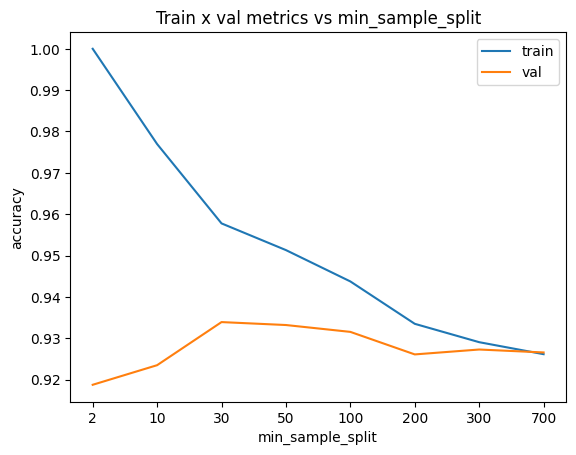

In [ ]:
plt.title('Train x val metrics vs min_sample_split')
plt.plot(training_accuracy,label='train')
plt.plot(val_accuracy,label='val')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_sample_split_list)),labels=min_sample_split_list)
plt.legend(loc='best')
plt.show()


In [ ]:
training_accuracy_max=[]
val_accuracy_max=[]
max_depth_list=[2,4,8,16,32,64,None]

for max_depth in max_depth_list:
  model=DecisionTreeClassifier(max_depth=max_depth)
  model.fit(x_train,y_train)
  predicted_y_train=model.predict(x_train)
  accuracy_train=Accuracy_score(y_train,predicted_y_train)
  training_accuracy_max.append(accuracy_train)

  predicted_y_val=model.predict(x_test)
  accuracy_val=Accuracy_score(y_test,predicted_y_val)
  val_accuracy_max.append(accuracy_val)


print(f"training accuracy={training_accuracy_max}")
print(f"val accuracy={val_accuracy_max}")

training accuracy=[0.9090209086062904, 0.9259610258840254, 0.9424865249067109, 0.9878576082449801, 1.0, 1.0, 1.0]
val accuracy=[0.9113954039327173, 0.9289267945984364, 0.9367448471926084, 0.9248993129590144, 0.9222932954276238, 0.9196872778962332, 0.9177919924188581]


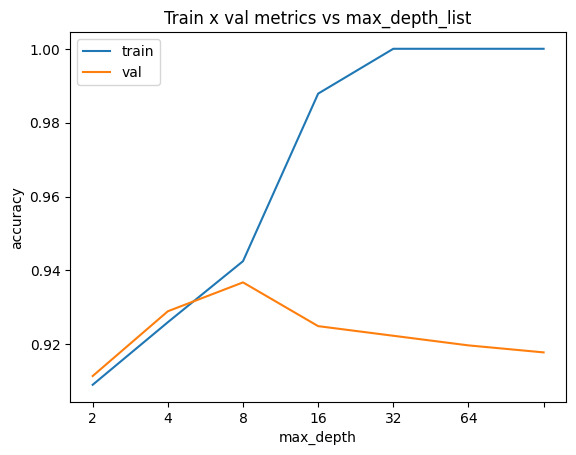

In [ ]:
plt.title('Train x val metrics vs max_depth_list')
plt.plot(training_accuracy_max,label='train')
plt.plot(val_accuracy_max,label='val')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.legend(loc='best')
plt.show()

In [ ]:
min_sample_split=30
max_depth=3
model=DecisionTreeClassifier(max_depth=max_depth,min_samples_split=min_sample_split)
model.fit(x_train,y_train)
predicted_y_train=model.predict(x_train)
accuracy_train=Accuracy_score(y_train,predicted_y_train)


predicted_y_val=model.predict(x_test)
accuracy_val=Accuracy_score(y_test,predicted_y_val)

print(f"accuracy of the training example={accuracy_train}")
print(f"accuracy of the val example={accuracy_val}")

f1_score_dcision_tree_train=f1_score(y_train,predicted_y_train)
print(f"f1_score train={f1_score_dcision_tree_train}")
f1_score_dcision_tree_test=f1_score(y_test,predicted_y_val)
print(f"f1_score test={f1_score_dcision_tree_test}")

accuracy of the training example=0.9144109459219333
accuracy of the val example=0.9168443496801706
f1_score train=0.8066372273517999
f1_score test=0.8089275993467612


In [ ]:
max_depth_list=[2,4,8,16,32,64,None]
min_sample_split_list=[2,10,30,50,100,200,300,700]
n_estimator_list=[10,20,40,50,80,100,200,300]



In [ ]:
Training_accuracy_depth=[]
val_accuracy_depth=[]

for max_depth in max_depth_list:
  model=RandomForestClassifier(max_depth=max_depth,random_state=0)
  model.fit(x_train,y_train)
  predicted_y_train=model.predict(x_train)
  accuracy_train=Accuracy_score(y_train,predicted_y_train)
  Training_accuracy_depth.append(accuracy_train)
  predicted_y_val=model.predict(x_test)
  accuracy_val=Accuracy_score(y_test,predicted_y_val)
  val_accuracy_depth.append(accuracy_val)


print(f"training accuracy={Training_accuracy_depth}")
print(f"val accuracy={val_accuracy_depth}")

training accuracy=[0.8449327726115027, 0.9154771071492034, 0.9352603210329917, 0.9911153231060831, 1.0, 1.0, 1.0]
val accuracy=[0.8462449656479507, 0.9173181710495143, 0.9320066334991708, 0.941246150201374, 0.9410092395167022, 0.9410092395167022, 0.9410092395167022]


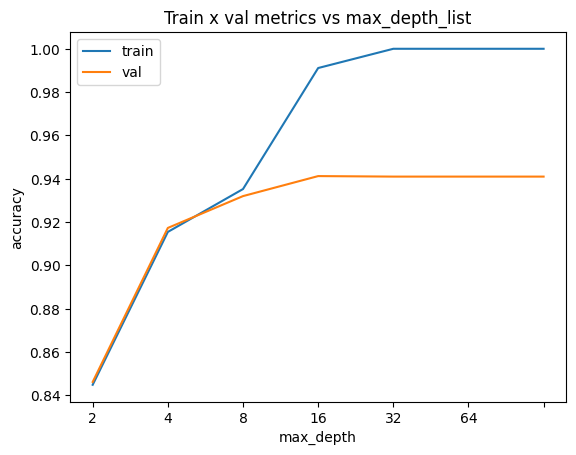

In [ ]:
plt.title('Train x val metrics vs max_depth_list')
plt.plot(Training_accuracy_depth,label='train')
plt.plot(val_accuracy_depth,label='val')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.legend(loc='best')
plt.show()

In [ ]:


Training_accuracy_tree = []
val_accuracy_tree = []

for n_estimator in n_estimator_list:
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    model.fit(x_train, y_train)
    predicted_y_train = model.predict(x_train)
    accuracy_train = Accuracy_score(y_train, predicted_y_train)
    Training_accuracy_tree.append(accuracy_train)
    predicted_y_val = model.predict(x_test)
    accuracy_val = Accuracy_score(y_test, predicted_y_val)
    val_accuracy_tree.append(accuracy_val)

print(f"Training accuracy: {Training_accuracy_tree}")
print(f"Validation accuracy: {val_accuracy_tree}")


Training accuracy: [0.9948468874015282, 0.9982230646212166, 0.9997038441035361, 0.9998815376414144, 1.0, 1.0, 1.0, 1.0]
Validation accuracy: [0.9365079365079365, 0.937455579246624, 0.9407723288320303, 0.9417199715707179, 0.9402985074626866, 0.9410092395167022, 0.9407723288320303, 0.9429045249940773]


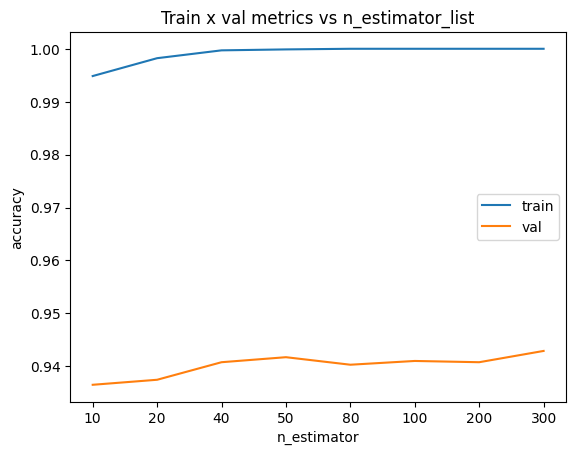

In [ ]:
plt.title('Train x val metrics vs n_estimator_list')
plt.plot(Training_accuracy_tree,label='train')
plt.plot(val_accuracy_tree,label='val')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(n_estimator_list)),labels=n_estimator_list)
plt.legend(loc='best')
plt.show()

In [ ]:
Training_accuracy_sample = []
val_accuracy_sample= []

for min_sample_split in min_sample_split_list:
    model = RandomForestClassifier(min_samples_split=min_sample_split, random_state=0)
    model.fit(x_train, y_train)
    predicted_y_train = model.predict(x_train)
    accuracy_train = Accuracy_score(y_train, predicted_y_train)
    Training_accuracy_sample.append(accuracy_train)
    predicted_y_val = model.predict(x_test)
    accuracy_val = Accuracy_score(y_test, predicted_y_val)
    val_accuracy_sample.append(accuracy_val)

print(f"Training accuracy: {Training_accuracy_sample}")
print(f"Validation accuracy: {val_accuracy_sample}")

Training accuracy: [1.0, 0.9785583130960137, 0.9530296748208257, 0.9408872830658058, 0.9331279985784517, 0.9272048806491737, 0.9262571817804892, 0.9227033110229225]
Validation accuracy: [0.9410092395167022, 0.9388770433546553, 0.9360341151385928, 0.9329542762378583, 0.9324804548685146, 0.9279791518597489, 0.9282160625444208, 0.9258469556977019]


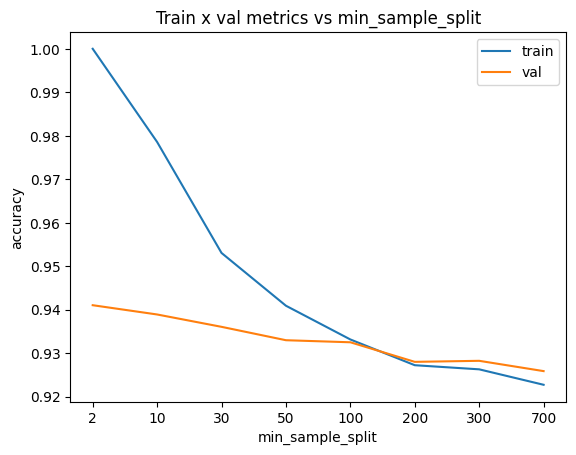

In [ ]:
plt.title('Train x val metrics vs min_sample_split')
plt.plot(Training_accuracy_sample,label='train')
plt.plot(val_accuracy_sample,label='val')
plt.xlabel('min_sample_split')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_sample_split_list)),labels=min_sample_split_list)
plt.legend(loc='best')
plt.show()

In [ ]:
min_sample_split=50
max_depth=12
n_estimator=40

tree_ensemble_model=RandomForestClassifier(min_samples_split=min_sample_split,max_depth=max_depth,n_estimators=n_estimator)
tree_ensemble_model.fit(x_train,y_train)

predicted_y_train=tree_ensemble_model.predict(x_train)
training_accuracy=Accuracy_score(y_train,predicted_y_train)

predicted_y_test=tree_ensemble_model.predict(x_test)
val_accuracy=accuracy_score(y_test,predicted_y_test)

print(f"accuracy of the training example={training_accuracy}")
print(f"accuracy of the val example={val_accuracy}")

f1_score_tree_ensemble_train=f1_score(y_train,predicted_y_train)
print(f"f1_score train={f1_score_tree_ensemble_train}")
f1_score_tree_ensemble_test=f1_score(y_test,predicted_y_test)
print(f"f1_score test={f1_score_tree_ensemble_test}")

accuracy of the training example=0.9382218799976307
accuracy of the val example=0.9343757403458895
f1_score train=0.8629615030876364
f1_score test=0.8516336368505624


In [ ]:
df2=pd.read_csv('fraudTest.csv')
df2

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:

unnamed_columns = [column for column in df2.columns if column.startswith('Unnamed')]
df2.drop(columns=unnamed_columns, inplace=True)



In [ ]:
columns=['cc_num','first','last','street','city','state','zip','trans_num','unix_time','merch_lat','merch_long','city_pop','lat','long']
df2.drop(columns=columns,inplace=True)
df2.head()

,trans_date_trans_time,merchant,category,amt,gender,job,dob,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Mechanical engineer,1968-03-19,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,"Sales professional, IT",1990-01-17,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,"Librarian, public",1970-10-21,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Set designer,1987-07-25,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Furniture designer,1955-07-06,0


In [ ]:
print('num of fraud ',len(df2[df2['is_fraud']==1]))
print('num of not fraud ',len(df2[df2['is_fraud']==0]))

num of fraud  2145
num of not fraud  553574


In [ ]:

df2['trans_date_trans_time'] = pd.to_datetime(df2['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

# Extracting different components from 'trans_date_trans_time'
df2['trans_month'] = df2['trans_date_trans_time'].dt.month
df2['trans_day'] = df2['trans_date_trans_time'].dt.day
df2['trans_hour'] = df2['trans_date_trans_time'].dt.hour
df2['trans_minute'] = df2['trans_date_trans_time'].dt.minute
df2['trans_second'] = df2['trans_date_trans_time'].dt.second


df2.drop(columns=['trans_date_trans_time'], inplace=True)


df2.head()

,merchant,category,amt,gender,job,dob,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second
0,fraud_Kirlin and Sons,personal_care,2.86,M,Mechanical engineer,1968-03-19,0,6,21,12,14,25
1,fraud_Sporer-Keebler,personal_care,29.84,F,"Sales professional, IT",1990-01-17,0,6,21,12,14,33
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,"Librarian, public",1970-10-21,0,6,21,12,14,53
3,fraud_Haley Group,misc_pos,60.05,M,Set designer,1987-07-25,0,6,21,12,15,15
4,fraud_Johnston-Casper,travel,3.19,M,Furniture designer,1955-07-06,0,6,21,12,15,17


In [ ]:

df2['dob'] = pd.to_datetime(df2['dob'], format='%Y-%m-%d')

present_date = pd.to_datetime('today')
df2['age'] = present_date.year - df2['dob'].dt.year

df2.drop(columns=['dob'], inplace=True)

df2.head()


,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Mechanical engineer,0,6,21,12,14,25,56
1,fraud_Sporer-Keebler,personal_care,29.84,F,"Sales professional, IT",0,6,21,12,14,33,34
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,"Librarian, public",0,6,21,12,14,53,54
3,fraud_Haley Group,misc_pos,60.05,M,Set designer,0,6,21,12,15,15,37
4,fraud_Johnston-Casper,travel,3.19,M,Furniture designer,0,6,21,12,15,17,69


In [ ]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
labels=[1,2,3,4,5,6,7,8,9,10]

df2['age_group']=pd.cut(df2['age'],bins=bins,labels=labels)
df2.drop(columns=['age'],inplace=True)
df2.head()

,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group
0,fraud_Kirlin and Sons,personal_care,2.86,M,Mechanical engineer,0,6,21,12,14,25,6
1,fraud_Sporer-Keebler,personal_care,29.84,F,"Sales professional, IT",0,6,21,12,14,33,4
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,"Librarian, public",0,6,21,12,14,53,6
3,fraud_Haley Group,misc_pos,60.05,M,Set designer,0,6,21,12,15,15,4
4,fraud_Johnston-Casper,travel,3.19,M,Furniture designer,0,6,21,12,15,17,7


In [ ]:

num_bins=100
df2['amt']=pd.cut(df2['amt'],bins=num_bins,labels=False)
df2.tail()

,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group
555714,fraud_Reilly and Sons,health_fitness,0,M,Town planner,0,12,31,23,59,7,6
555715,fraud_Hoppe-Parisian,kids_pets,0,M,Futures trader,0,12,31,23,59,9,3
555716,fraud_Rau-Robel,kids_pets,0,F,Musician,0,12,31,23,59,15,5
555717,fraud_Breitenberg LLC,travel,0,M,Cartographer,0,12,31,23,59,24,6
555718,fraud_Dare-Marvin,entertainment,0,M,Media buyer,0,12,31,23,59,34,4


In [ ]:
label_encoder=LabelEncoder()
df2['merchant']=label_encoder.fit_transform(df2['merchant'])
df2['category']=label_encoder.fit_transform(df2['category'])
df2['job']=label_encoder.fit_transform(df2['job'])
df2.head()

,merchant,category,amt,gender,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group
0,319,10,0,M,275,0,6,21,12,14,25,6
1,591,10,0,F,392,0,6,21,12,14,33,4
2,611,5,0,F,259,0,6,21,12,14,53,6
3,222,9,0,M,407,0,6,21,12,15,15,4
4,292,13,0,M,196,0,6,21,12,15,17,7


In [ ]:
# now one hot encoding gender column
df2 = pd.get_dummies(data=df2, prefix='gender', columns=['gender'])

print(df2.head())


   merchant  category  amt  job  is_fraud  trans_month  trans_day  trans_hour  \
0       319        10    0  275         0            6         21          12   
1       591        10    0  392         0            6         21          12   
2       611         5    0  259         0            6         21          12   
3       222         9    0  407         0            6         21          12   
4       292        13    0  196         0            6         21          12   

   trans_minute  trans_second age_group  gender_F  gender_M  
0            14            25         6     False      True  
1            14            33         4      True     False  
2            14            53         6      True     False  
3            15            15         4     False      True  
4            15            17         7     False      True  


In [ ]:
df2['gender_M']=df2['gender_M'].map({True:1,False:0})
df2['gender_F']=df2['gender_F'].map({True:1,False:0})
df2.head()

,merchant,category,amt,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group,gender_F,gender_M
0,319,10,0,275,0,6,21,12,14,25,6,0,1
1,591,10,0,392,0,6,21,12,14,33,4,1,0
2,611,5,0,259,0,6,21,12,14,53,6,1,0
3,222,9,0,407,0,6,21,12,15,15,4,0,1
4,292,13,0,196,0,6,21,12,15,17,7,0,1


In [ ]:
df2_not_fraud=df2[df2['is_fraud']==0]
df2_fraud=df2[df2['is_fraud']==1]
print(f"shape of df1_not_fraud={df2_not_fraud.shape}")
print(f"shape of df1_fraud={df2_fraud.shape}")

shape of df1_not_fraud=(553574, 13)
shape of df1_fraud=(2145, 13)


In [ ]:
df2_sample=df2_not_fraud.sample(n=6435)
df2_shuffled=pd.concat([df2_sample,df2_fraud],axis=0)
print(f"shape of df concatenate={df2_shuffled.shape}")
df2_shuffled.head()

shape of df concatenate=(8580, 13)


,merchant,category,amt,job,is_fraud,trans_month,trans_day,trans_hour,trans_minute,trans_second,age_group,gender_F,gender_M
389537,217,4,0,92,0,11,21,0,29,1,5,0,1
285601,112,7,0,337,0,10,5,23,38,1,5,1,0
253453,648,1,0,346,0,9,21,22,32,41,7,0,1
490630,506,6,0,445,0,12,17,14,13,5,6,0,1
395464,651,7,0,218,0,11,23,13,30,30,6,0,1


In [ ]:
X_test=df2_shuffled.drop(columns=['is_fraud'])
Y_test=df2_shuffled['is_fraud']

print(f"shape of x test={X_test.shape}")
print(f"shape of y test={Y_test.shape}")

shape of x test=(8580, 12)
shape of y test=(8580,)


In [ ]:
Y_pred_test_model1=tree_ensemble_model.predict(X_test)
test_accuracy_model1=Accuracy_score(Y_test,Y_pred_test_model1)
print(f"test accuracy={test_accuracy_model1}")

f1_score_test_model1=f1_score(Y_test,Y_pred_test_model1)
print(f"f1 score test={f1_score_test_model1}")

test accuracy=0.8315850815850816
f1 score test=0.49528466643381064


In [ ]:
Y_pred_test_model2=logits_model.predict(X_test)
test_accuracy_model2=Accuracy_score(Y_test,Y_pred_test_model2)
print(f"test accuracy={test_accuracy_model2}")

f1_score_test_model2=f1_score(Y_test,Y_pred_test_model2)
print(f"f1 score test={f1_score_test_model2}")

test accuracy=0.7858974358974359
f1 score test=0.2607645875251509


In [ ]:
Y_pred_test_model3=model.predict(X_test)
test_accuracy_model3=Accuracy_score(Y_test,Y_pred_test_model3)
print(f"test accuracy={test_accuracy_model3}")

f1_score_test_model3=f1_score(Y_test,Y_pred_test_model3)
print(f"f1 score test={f1_score_test_model3}")

test accuracy=0.8526806526806526
f1 score test=0.5890767230169051


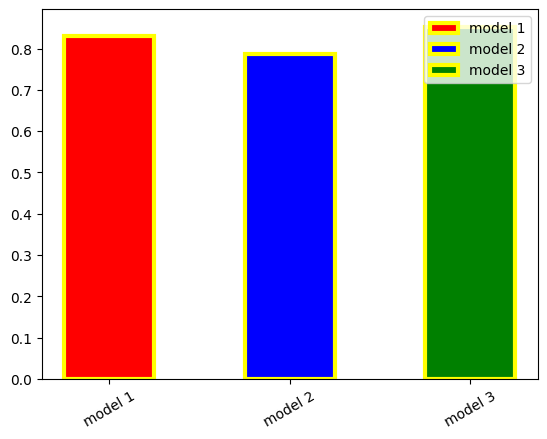

In [ ]:
accuracy_score_list=[test_accuracy_model1,test_accuracy_model2,test_accuracy_model3]
models=['model 1','model 2','model 3']
n=len(accuracy_score_list)
colors=['red','blue','green']

p=np.arange(n)
plt.bar(p,accuracy_score_list,width=0.5,color=colors,label=models,edgecolor='yellow',linewidth=3,alpha=1)
plt.xticks(p,models,rotation=30)
plt.legend(loc='best')
plt.show()


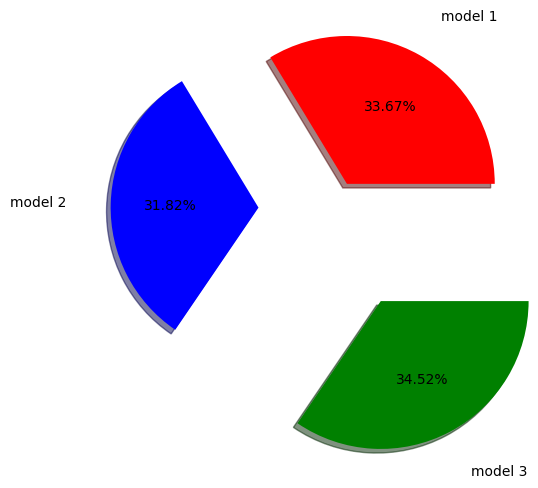

In [ ]:


# Example accuracy scores
accuracy_score_list = [test_accuracy_model1, test_accuracy_model2, test_accuracy_model3]
models = ['model 1', 'model 2', 'model 3']
colors = ['red', 'blue', 'green']
ex = [0.2, 0.5, 0.7]

plt.pie(accuracy_score_list, labels=models, explode=ex, colors=colors, autopct="%0.2f%%", shadow=True, labeldistance=1.3)
plt.show()


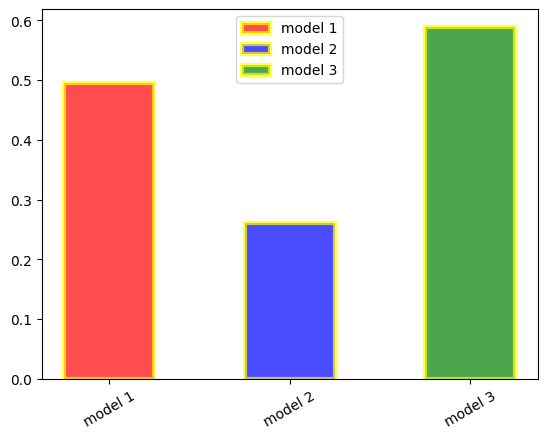

In [ ]:
f1_score=[f1_score_test_model1,f1_score_test_model2,f1_score_test_model3]
models=['model 1','model 2','model 3']
n=len(f1_score)
colors=['red','blue','green']

p=np.arange(n)
plt.bar(p,f1_score,width=0.5,color=colors,label=models,edgecolor='yellow',linewidth=3,alpha=0.7)
plt.xticks(p,models,rotation=30)
plt.legend(loc='best')
plt.show()

